# Recommendation System Based on Collaborative Filtering

In [1]:
#Importing Important Library
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [2]:
#Reading First Dataset
data_web = pd.read_csv('C:\\Reva\\BA06\\2nd Year\\capstone_project\\credit card recommadation\\dataset\\credit_card_recomm.csv')
df_names = pd.read_csv('C:\\Reva\\BA06\\2nd Year\\capstone_project\\credit card recommadation\\dataset\\names.csv')

In [3]:
data_df = data_web[data_web['polarity_type'] != 'Neutral']
data_df = data_df[data_web['polarity_type'] != 'Negative']

C:\Users\madhu\AppData\Local\Temp/ipykernel_11516/2214672127.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_df = data_df[data_web['polarity_type'] != 'Negative']


In [4]:
data_df

,serial_number,credit_card,reviews,user,comment,polarity,polarity_type,card_category
0,0,HDFC Bank Credit Card,travel-specific HDFC credit card 2019. Luckily...,Mrityunjay Abhivyakti,"travel-specif hdfc credit card 2019. luckily, ...",0.400000,Positive,reward
1,1,State Bank of India Credit Card,have been using Credit Card since 2019. like s...,Mangesh Kumar,have been use credit card sinc 2019. like shop...,0.431667,Positive,shopping
2,2,ICICI Bank Credit Card,thing sure that Paisabazaar quality profession...,Ojasvini,thing sure that paisabazaar qualiti profession...,0.550000,Positive,general
3,3,HDFC Bank Credit Card,This first credit card still have with because...,Rahul Kumar Arya,thi first credit card still have with becaus s...,0.316667,Positive,reward
6,6,State Bank of India Credit Card,Simply Click good card online shopping. reward...,Ritu Kushwaha,simpli click good card onlin shopping. rewards...,0.700000,Positive,shopping
...,...,...,...,...,...,...,...,...
5055,5055,State Bank of India Credit Card,"being loyal customer SBI, Simply Save Card fre...",Latika,"be loyal custom sbi, simpli save card free lif...",0.366667,Positive,general
5056,5056,State Bank of India Credit Card,Gave this card free lifetime. best.,Samya,gave thi card free lifetime. best.,0.700000,Positive,general
5063,5063,State Bank of India Credit Card,There cards that secured benefit Simply Save c...,Akansha,there card that secur benefit simpli save card...,0.800000,Positive,general
5066,5066,State Bank of India Credit Card,payment bills easy hassle free with Easy Bill ...,Pari,payment bill easi hassl free with easi bill sc...,0.400000,Positive,general


In [5]:
datas=pd.merge(data_df,df_names, left_on='user', right_on='names')
datas.rename(columns = {'0':'userid'}, inplace = True)

In [6]:
datas

,serial_number,credit_card,reviews,user,comment,polarity,polarity_type,card_category,names,userid
0,0,HDFC Bank Credit Card,travel-specific HDFC credit card 2019. Luckily...,Mrityunjay Abhivyakti,"travel-specif hdfc credit card 2019. luckily, ...",0.400000,Positive,reward,Mrityunjay Abhivyakti,0
1,1,State Bank of India Credit Card,have been using Credit Card since 2019. like s...,Mangesh Kumar,have been use credit card sinc 2019. like shop...,0.431667,Positive,shopping,Mangesh Kumar,1
2,2,ICICI Bank Credit Card,thing sure that Paisabazaar quality profession...,Ojasvini,thing sure that paisabazaar qualiti profession...,0.550000,Positive,general,Ojasvini,2
3,3,HDFC Bank Credit Card,This first credit card still have with because...,Rahul Kumar Arya,thi first credit card still have with becaus s...,0.316667,Positive,reward,Rahul Kumar Arya,3
4,6,State Bank of India Credit Card,Simply Click good card online shopping. reward...,Ritu Kushwaha,simpli click good card onlin shopping. rewards...,0.700000,Positive,shopping,Ritu Kushwaha,4
...,...,...,...,...,...,...,...,...,...,...
2023,4984,State Bank of India Credit Card,could easily cash loan against card. Great ben...,Kalpana,could easili cash loan against card. great ben...,0.800000,Positive,general,Kalpana,842
2024,5005,State Bank of India Credit Card,"entire process getting approval easy, quick ha...",Ekta,"entir process get approv easy, quick hassl fre...",0.366667,Positive,general,Ekta,843
2025,5011,State Bank of India Credit Card,could avail card with card free.,Manjari,could avail card with card free.,0.400000,Positive,general,Manjari,844
2026,5040,State Bank of India Credit Card,This card perfect people like shop wish save s...,Kanchi,thi card perfect peopl like shop wish save sam...,1.000000,Positive,shopping,Kanchi,845


In [7]:
datas['polarity_type'].value_counts()

Positive    2028
Name: polarity_type, dtype: int64

In [8]:
datas['credit_card_category'] = data_web['credit_card'] + ' - ' + data_web['card_category']

In [9]:
datas.head()

,serial_number,credit_card,reviews,user,comment,polarity,polarity_type,card_category,names,userid,credit_card_category
0,0,HDFC Bank Credit Card,travel-specific HDFC credit card 2019. Luckily...,Mrityunjay Abhivyakti,"travel-specif hdfc credit card 2019. luckily, ...",0.400000,Positive,reward,Mrityunjay Abhivyakti,0,HDFC Bank Credit Card - reward
1,1,State Bank of India Credit Card,have been using Credit Card since 2019. like s...,Mangesh Kumar,have been use credit card sinc 2019. like shop...,0.431667,Positive,shopping,Mangesh Kumar,1,State Bank of India Credit Card - shopping
2,2,ICICI Bank Credit Card,thing sure that Paisabazaar quality profession...,Ojasvini,thing sure that paisabazaar qualiti profession...,0.550000,Positive,general,Ojasvini,2,ICICI Bank Credit Card - general
3,3,HDFC Bank Credit Card,This first credit card still have with because...,Rahul Kumar Arya,thi first credit card still have with becaus s...,0.316667,Positive,reward,Rahul Kumar Arya,3,HDFC Bank Credit Card - reward
4,6,State Bank of India Credit Card,Simply Click good card online shopping. reward...,Ritu Kushwaha,simpli click good card onlin shopping. rewards...,0.700000,Positive,shopping,Ritu Kushwaha,4,American Express Credit Card - reward


In [10]:
datasets = datas[['userid','user','credit_card_category','polarity']]
datas = datas[['userid','credit_card_category','polarity']]

In [11]:
datas.head(5)

,userid,credit_card_category,polarity
0,0,HDFC Bank Credit Card - reward,0.400000
1,1,State Bank of India Credit Card - shopping,0.431667
2,2,ICICI Bank Credit Card - general,0.550000
3,3,HDFC Bank Credit Card - reward,0.316667
4,4,American Express Credit Card - reward,0.700000


In [12]:
bins=(0.000000,0.200000,0.400000,0.600000,0.800000,1.000000)
names=[1,2,3,4,5]
datas['polarity_bin']=pd.cut(datas['polarity'],bins,labels=names)
datais = datas

C:\Users\madhu\AppData\Local\Temp/ipykernel_11516/3675401817.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas['polarity_bin']=pd.cut(datas['polarity'],bins,labels=names)


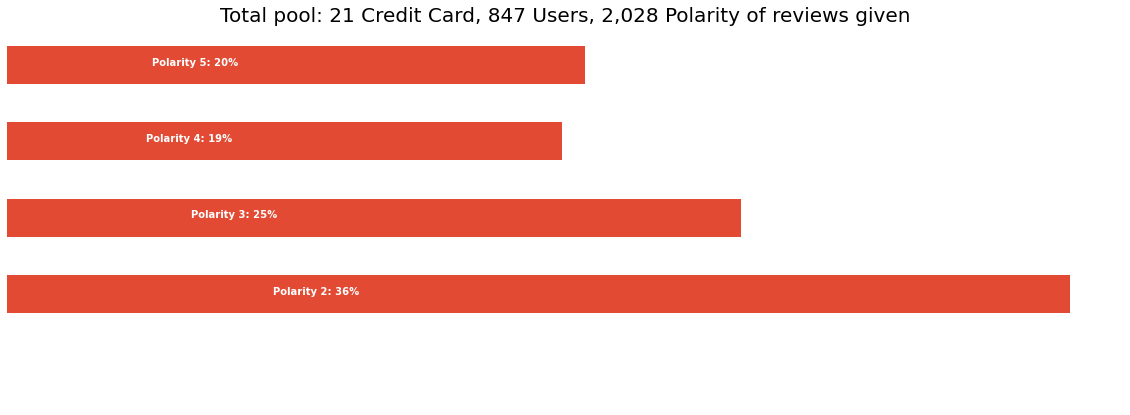

In [13]:
p = datais.groupby('polarity_bin')['polarity_bin'].agg(['count'])

# get movie count
credit_card_count = datais['credit_card_category'].nunique()
# get customer count
users_count = datais['userid'].nunique()
# get rating count
polarity_count = datais['userid'].count()
#Plottng graph
ax = p.plot(kind = 'barh', legend = False, figsize = (20,7))
plt.title('Total pool: {:,} Credit Card, {:,} Users, {:,} Polarity of reviews given'.format(credit_card_count, users_count, polarity_count), fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Polarity {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')

<AxesSubplot:xlabel='polarity_bin', ylabel='count'>

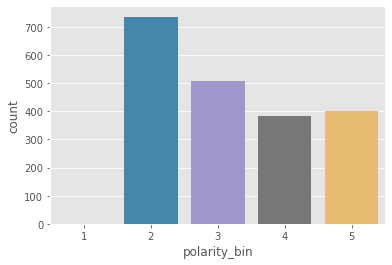

In [14]:
# Plotting count of rating to see how it's distributed
sns.countplot(x='polarity_bin',data=datais)

In [15]:
datas['polarity_bin'] = datas['polarity_bin'].astype(int)

C:\Users\madhu\AppData\Local\Temp/ipykernel_11516/3068424218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas['polarity_bin'] = datas['polarity_bin'].astype(int)


In [16]:
datas
datas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2028 entries, 0 to 2027
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   userid                2028 non-null   int64  
 1   credit_card_category  2028 non-null   object 
 2   polarity              2028 non-null   float64
 3   polarity_bin          2028 non-null   int32  
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 135.8+ KB


In [17]:
datais.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2028 entries, 0 to 2027
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   userid                2028 non-null   int64  
 1   credit_card_category  2028 non-null   object 
 2   polarity              2028 non-null   float64
 3   polarity_bin          2028 non-null   int32  
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 135.8+ KB


In [18]:
data = datas[['userid','credit_card_category','polarity_bin']]

In [19]:
data

,userid,credit_card_category,polarity_bin
0,0,HDFC Bank Credit Card - reward,2
1,1,State Bank of India Credit Card - shopping,3
2,2,ICICI Bank Credit Card - general,3
3,3,HDFC Bank Credit Card - reward,2
4,4,American Express Credit Card - reward,4
...,...,...,...
2023,842,ICICI Bank Credit Card - general,4
2024,843,ICICI Bank Credit Card - reward,2
2025,844,ICICI Bank Credit Card - reward,2
2026,845,ICICI Bank Credit Card - general,5


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2028 entries, 0 to 2027
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   userid                2028 non-null   int64 
 1   credit_card_category  2028 non-null   object
 2   polarity_bin          2028 non-null   int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 120.0+ KB


In [21]:
data.describe()

,userid,polarity_bin
count,2028.000000,2028.000000
mean,320.950197,3.220907
std,232.171455,1.137128
min,0.000000,2.000000
25%,122.000000,2.000000
50%,270.000000,3.000000
75%,495.250000,4.000000
max,846.000000,5.000000


In [22]:
data.isnull().sum()

userid                  0
credit_card_category    0
polarity_bin            0
dtype: int64

In [23]:
data.corr()

,userid,polarity_bin
userid,1.000000,0.026829
polarity_bin,0.026829,1.000000


In [24]:
df=data.copy()

In [25]:
df.head(5)

,userid,credit_card_category,polarity_bin
0,0,HDFC Bank Credit Card - reward,2
1,1,State Bank of India Credit Card - shopping,3
2,2,ICICI Bank Credit Card - general,3
3,3,HDFC Bank Credit Card - reward,2
4,4,American Express Credit Card - reward,4


In [26]:
df.userid.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [27]:
n_users = df.userid.unique().shape[0]
n_users

847

In [28]:
B_items = df.credit_card_category.unique().shape[0]
B_items

21

In [29]:
book_df = df.pivot_table(index='userid',
                   columns='credit_card_category',
                   values='polarity_bin').reset_index(drop=True)

In [30]:
book_df

credit_card_category,American Express Credit Card - cashback,American Express Credit Card - fuel,American Express Credit Card - general,American Express Credit Card - lifestyle,American Express Credit Card - reward,American Express Credit Card - shopping,American Express Credit Card - travel,HDFC Bank Credit Card - cashback,HDFC Bank Credit Card - fuel,HDFC Bank Credit Card - general,...,HDFC Bank Credit Card - reward,HDFC Bank Credit Card - shopping,HDFC Bank Credit Card - travel,ICICI Bank Credit Card - fuel,ICICI Bank Credit Card - general,ICICI Bank Credit Card - reward,State Bank of India Credit Card - general,State Bank of India Credit Card - reward,State Bank of India Credit Card - shopping,State Bank of India Credit Card - travel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN


In [31]:
book_df.fillna(0, inplace=True)
book_df

credit_card_category,American Express Credit Card - cashback,American Express Credit Card - fuel,American Express Credit Card - general,American Express Credit Card - lifestyle,American Express Credit Card - reward,American Express Credit Card - shopping,American Express Credit Card - travel,HDFC Bank Credit Card - cashback,HDFC Bank Credit Card - fuel,HDFC Bank Credit Card - general,...,HDFC Bank Credit Card - reward,HDFC Bank Credit Card - shopping,HDFC Bank Credit Card - travel,ICICI Bank Credit Card - fuel,ICICI Bank Credit Card - general,ICICI Bank Credit Card - reward,State Bank of India Credit Card - general,State Bank of India Credit Card - reward,State Bank of India Credit Card - shopping,State Bank of India Credit Card - travel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0


In [32]:
AVG = df['polarity_bin'].mean()
print(AVG)

3.2209072978303745


In [33]:
# Calculate the minimum number of votes required to be in the chart, 
minimum = data['polarity_bin'].quantile(0.90)
print(minimum)

5.0


In [34]:
# Filter out all qualified Books into a new DataFrame
q_Books = data.copy().loc[data['polarity_bin'] >= minimum]
q_Books.shape

(400, 3)

In [35]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [36]:
uc_sim = 1 - pairwise_distances( book_df.values,metric='cosine')
uc_sim.shape

(847, 847)

In [37]:
uc_sim[1]

array([0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.70710678, 0.        , 0.        , 0.        ,
       0.61545745, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [38]:
#Store the results in a dataframe
uc_sim_df = pd.DataFrame(uc_sim)
uc_sim_df.index = df.userid.unique()
uc_sim_df.columns = df.userid.unique()

In [39]:
uc_sim_df.iloc[0:10, 0:10]

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.000000,0.0,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.0000
1,0.0,1.000000,0.0,0.0,0.000000,0.0,0.707107,0.0,0.000000,0.0000
2,0.0,0.000000,1.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0000
3,1.0,0.000000,0.0,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.0000
4,0.0,0.000000,0.0,0.0,1.000000,0.0,0.707107,0.0,0.832050,0.0000
5,0.0,0.000000,0.0,0.0,0.000000,1.0,0.000000,0.0,0.000000,0.0000
6,0.0,0.707107,0.0,0.0,0.707107,0.0,1.000000,0.0,0.588348,0.0000
7,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.0000
8,0.0,0.000000,0.0,0.0,0.832050,0.0,0.588348,0.0,1.000000,0.5547
9,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.554700,1.0000


In [40]:
uc_sim_df.idxmax(axis=1)[0:125]

0        0
1        1
2        2
3        0
4        4
      ... 
120     13
121     13
122    122
123    123
124    124
Length: 125, dtype: int64

In [41]:
users=df[(df['userid']==27) | (df['userid']==17)]
users

,userid,credit_card_category,polarity_bin
39,17,HDFC Bank Credit Card - reward,2
40,17,HDFC Bank Credit Card - general,2
41,17,HDFC Bank Credit Card - general,2
65,27,HDFC Bank Credit Card - general,2
66,27,HDFC Bank Credit Card - general,2
67,27,HDFC Bank Credit Card - general,3
68,27,HDFC Bank Credit Card - general,3
69,27,HDFC Bank Credit Card - general,3
70,27,HDFC Bank Credit Card - general,3
71,27,HDFC Bank Credit Card - general,2


In [42]:
user_1=df[(df['userid']==27)] 
user_1

,userid,credit_card_category,polarity_bin
65,27,HDFC Bank Credit Card - general,2
66,27,HDFC Bank Credit Card - general,2
67,27,HDFC Bank Credit Card - general,3
68,27,HDFC Bank Credit Card - general,3
69,27,HDFC Bank Credit Card - general,3
70,27,HDFC Bank Credit Card - general,3
71,27,HDFC Bank Credit Card - general,2
72,27,HDFC Bank Credit Card - shopping,3
73,27,HDFC Bank Credit Card - general,4
74,27,HDFC Bank Credit Card - general,4


In [43]:
user_2=df[(df['userid']==17)] 
user_2

,userid,credit_card_category,polarity_bin
39,17,HDFC Bank Credit Card - reward,2
40,17,HDFC Bank Credit Card - general,2
41,17,HDFC Bank Credit Card - general,2


In [44]:
indices = pd.Series(df.index, index=df['credit_card_category']).drop_duplicates()

In [45]:
indices[:10]

credit_card_category
HDFC Bank Credit Card - reward                0
State Bank of India Credit Card - shopping    1
ICICI Bank Credit Card - general              2
HDFC Bank Credit Card - reward                3
American Express Credit Card - reward         4
State Bank of India Credit Card - reward      5
State Bank of India Credit Card - shopping    6
American Express Credit Card - reward         7
American Express Credit Card - travel         8
American Express Credit Card - reward         9
dtype: int64

In [46]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(Book_Title, cosine_sim=uc_sim):
    # Get the index of the books that matches the title
    idx = indices[Book_Title]

    # Get the pairwsie similarity scores of all books with that books
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1].any(), reverse=True)

    # Get the scores of the 10 most similar books
    sim_scores = sim_scores[0:5]

    # Get the book indices
    books_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar books
    return df['credit_card_category'].iloc[books_indices]

In [47]:
a=get_recommendations('HDFC Bank Credit Card - reward')
a

0                HDFC Bank Credit Card - reward
1    State Bank of India Credit Card - shopping
2              ICICI Bank Credit Card - general
3                HDFC Bank Credit Card - reward
4         American Express Credit Card - reward
Name: credit_card_category, dtype: object

In [48]:
b=get_recommendations('State Bank of India Credit Card - shopping')
b

0                HDFC Bank Credit Card - reward
1    State Bank of India Credit Card - shopping
2              ICICI Bank Credit Card - general
Name: credit_card_category, dtype: object

In [49]:
pd.merge(user_1,user_2,on='credit_card_category',how='outer')

,userid_x,credit_card_category,polarity_bin_x,userid_y,polarity_bin_y
0,27,HDFC Bank Credit Card - general,2,17.0,2.0
1,27,HDFC Bank Credit Card - general,2,17.0,2.0
2,27,HDFC Bank Credit Card - general,2,17.0,2.0
3,27,HDFC Bank Credit Card - general,2,17.0,2.0
4,27,HDFC Bank Credit Card - general,3,17.0,2.0
5,27,HDFC Bank Credit Card - general,3,17.0,2.0
6,27,HDFC Bank Credit Card - general,3,17.0,2.0
7,27,HDFC Bank Credit Card - general,3,17.0,2.0
8,27,HDFC Bank Credit Card - general,3,17.0,2.0
9,27,HDFC Bank Credit Card - general,3,17.0,2.0


In [50]:
book_user_rating = book_df["State Bank of India Credit Card - shopping"]  
book_user_rating

0      0.0
1      3.0
2      0.0
3      0.0
4      0.0
      ... 
842    0.0
843    0.0
844    0.0
845    0.0
846    0.0
Name: State Bank of India Credit Card - shopping, Length: 847, dtype: float64

In [51]:
#Finding the correlation with different movies
similar_to_book = book_df.corrwith(book_user_rating)

In [52]:
corr_book = pd.DataFrame(similar_to_book, columns=['Correlation'])
corr_book.dropna(inplace=True)
corr_book.head()

,Correlation
credit_card_category,
American Express Credit Card - cashback,-0.004391
American Express Credit Card - fuel,-0.005327
American Express Credit Card - general,-0.064637
American Express Credit Card - lifestyle,-0.007633
American Express Credit Card - reward,-0.011994


In [53]:
corr_book[corr_book['Correlation'] > 0].sort_values(by='Correlation', ascending=False).head(10)  

,Correlation
credit_card_category,
State Bank of India Credit Card - shopping,1.000000
HDFC Bank Credit Card - reward,0.123375
HDFC Bank Credit Card - general,0.081068


In [54]:
ratings_mean_count = pd.DataFrame(df.groupby('credit_card_category')['polarity_bin'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(df.groupby('credit_card_category')['polarity_bin'].count())

In [55]:
plt.style.use('dark_background')

<AxesSubplot:>

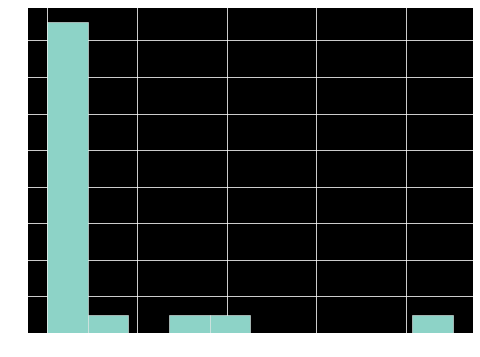

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=10)

<AxesSubplot:>

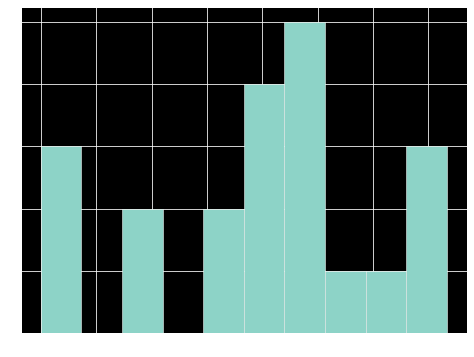

In [57]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['polarity_bin'].hist(bins=10)

<Figure size 576x432 with 0 Axes>

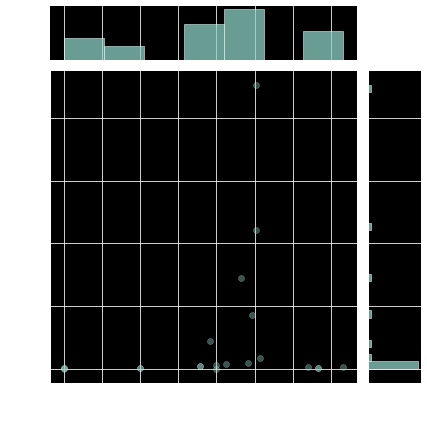

In [58]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='polarity_bin', y='rating_counts', data=ratings_mean_count, alpha=0.4)

Outcomes
From the output you can see that the Books that have high correlation with " are not very well known.
This shows that correlation alone is not a good metric for similarity because there can be a user who wished to take those books and only other books and rated them same.

# KNN Based Collaborative Model

In [59]:
data

,userid,credit_card_category,polarity_bin
0,0,HDFC Bank Credit Card - reward,2
1,1,State Bank of India Credit Card - shopping,3
2,2,ICICI Bank Credit Card - general,3
3,3,HDFC Bank Credit Card - reward,2
4,4,American Express Credit Card - reward,4
...,...,...,...
2023,842,ICICI Bank Credit Card - general,4
2024,843,ICICI Bank Credit Card - reward,2
2025,844,ICICI Bank Credit Card - reward,2
2026,845,ICICI Bank Credit Card - general,5


In [60]:
data['credit_card_category']

0                   HDFC Bank Credit Card - reward
1       State Bank of India Credit Card - shopping
2                 ICICI Bank Credit Card - general
3                   HDFC Bank Credit Card - reward
4            American Express Credit Card - reward
                           ...                    
2023              ICICI Bank Credit Card - general
2024               ICICI Bank Credit Card - reward
2025               ICICI Bank Credit Card - reward
2026              ICICI Bank Credit Card - general
2027                 ICICI Bank Credit Card - fuel
Name: credit_card_category, Length: 2028, dtype: object

In [61]:
len(set(data['credit_card_category']))

21

In [62]:
pivot_table = data.pivot_table(index='credit_card_category', columns='userid', values='polarity_bin' ).fillna(0)

In [63]:
pivot_table.shape

(21, 847)

In [64]:
from scipy.sparse import csr_matrix

In [65]:
feature_matrix = csr_matrix(pivot_table.values)

In [66]:
feature_matrix

<21x847 sparse matrix of type '<class 'numpy.float64'>'
	with 1185 stored elements in Compressed Sparse Row format>

In [67]:
from sklearn.neighbors import NearestNeighbors

In [68]:
knn_model = NearestNeighbors(metric='cosine', algorithm='brute',  )

In [69]:
knn_model.fit(feature_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [70]:
query_index = np.random.choice(pivot_table.shape[0])

In [71]:
query_index

8

In [72]:
query_id = np.random.choice(pivot_table.shape[1])

In [73]:
query_id

135

In [74]:
pivot_table.iloc[16:]

userid,0,1,2,3,4,5,6,7,8,9,...,837,838,839,840,841,842,843,844,845,846
credit_card_category,,,,,,,,,,,,,,,,,,,,,
ICICI Bank Credit Card - reward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0
State Bank of India Credit Card - general,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
State Bank of India Credit Card - reward,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
State Bank of India Credit Card - shopping,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
State Bank of India Credit Card - travel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
pivot_table.iloc[16,:].values.reshape(1,-1)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [76]:
distances, indices = knn_model.kneighbors(pivot_table.iloc[query_index,:].values.reshape(1,-1),n_neighbors=5)

In [77]:
distances

array([[0.        , 0.86552552, 0.87309841, 0.87534303, 1.        ]])

In [78]:
indices.flatten()

array([ 8, 10,  9, 11, 14], dtype=int64)

In [79]:
pivot_table.index[16]

'ICICI Bank Credit Card - reward'

In [80]:
pivot_table.iloc[indices.flatten()].index

Index(['HDFC Bank Credit Card - fuel', 'HDFC Bank Credit Card - lifestyle',
       'HDFC Bank Credit Card - general', 'HDFC Bank Credit Card - reward',
       'ICICI Bank Credit Card - fuel'],
      dtype='object', name='credit_card_category')

In [81]:
for i in range(0,len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}'.format(pivot_table.index[query_index]))
        
    else:
        print('{} : {}, with a distance of {}'.format(i,pivot_table.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for HDFC Bank Credit Card - fuel
1 : HDFC Bank Credit Card - lifestyle, with a distance of 0.86552552474476
2 : HDFC Bank Credit Card - general, with a distance of 0.8730984066413561
3 : HDFC Bank Credit Card - reward, with a distance of 0.8753430253253338
4 : ICICI Bank Credit Card - fuel, with a distance of 1.0
